<a href="https://colab.research.google.com/github/serinamarie/DS-Unit-2-Regression-Classification/blob/master/Grill_assignment_regression_classification_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science, Unit 2: Predictive Modeling

# Regression & Classification, Module 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.


The data comes from renthop.com, an apartment listing website.

- [ ] Look at the data. What's the distribution of the target, `price`, and features such as `longitude` and `latitude`? Remove outliers.
- [ ] After you remove outliers, what is the mean price in your subset of the data?
- [ ] Choose a feature, and plot its relationship with the target.
- [ ] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [ ] Define a function to make new predictions and explain the model coefficient.
- [ ] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

In [0]:
import os, sys
in_colab = 'google.colab' in sys.modules

# If you're in Colab...
if in_colab:
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification.git
    !git pull origin master
    
    # Install required python packages
    !pip install -r requirements.txt
    
    # Change into directory for module
    os.chdir('module1')

Reinitialized existing Git repository in /content/.git/
fatal: remote origin already exists.
From https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification
 * branch            master     -> FETCH_HEAD
Already up to date.
     |████████████████████████████████| 92kB 3.6MB/s 
     |████████████████████████████████| 112kB 9.3MB/s 
     |████████████████████████████████| 57.7MB 1.2MB/s 
     |████████████████████████████████| 235kB 43.6MB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.0-cp36-none-any.whl size=57690723 sha256=06df6d13b9243e5931b153350b26730f7cfaf492b4ff7b7d016a789a2bfe0486
  Stored in directory: /root/.cache/pip/wheels/7d/08/51/63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
  Created wheel for shap: filename=shap-0.29.3-cp36-cp36m-linux_x86_64.whl size=344728 sha256=c8e41add8acd342bc1fb9e7f6aa829ff070e9a14e64122d1e91c64f4a5b78d12
  Stored in directory: /root/.cache/pip/wheels/00/20/87/d199e4d7397997f5494e4098104f91313ac8120753bee7b032
Successfully built p

In [0]:
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
# Read New York City apartment rental listing data
import pandas as pd
df = pd.read_csv('../data/renthop-nyc.csv')
assert df.shape == (49352, 34)

In [0]:
import pandas_profiling

In [0]:
df = df.query('longitude != 0')

In [0]:
df = df.query('longitude != -118.2710')

In [0]:
df = df.query('price > 50')

In [0]:
df = df.query('price < 135000')

In [0]:
import matplotlib.pyplot as plt

In [0]:
df = df.drop(['description', 'display_address', 'interest_level'], axis=1)

In [0]:
df.corr()

,bathrooms,bedrooms,latitude,longitude,price,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
bathrooms,1.000000,0.533255,0.019937,-0.011013,0.652997,0.134023,0.018621,0.094221,0.022540,0.166086,0.170446,0.125292,-0.014303,0.147772,-0.015188,0.219964,0.103272,0.147872,0.244095,0.091470,0.140814,0.115851,0.064969,0.152525,-0.000749,0.013390,0.096124,0.075645,-0.003116
bedrooms,0.533255,1.000000,0.004214,0.012335,0.454356,-0.019302,-0.010067,0.099119,-0.008335,-0.035885,0.156819,0.164805,0.007744,0.018074,0.001983,0.160785,0.049152,0.128581,0.197364,0.064622,0.101166,0.037854,0.002615,0.105576,-0.015239,-0.104857,0.072375,0.017828,0.003032
latitude,0.019937,0.004214,1.000000,-0.053953,-0.010338,-0.009281,-0.022321,0.009934,-0.022462,-0.039833,-0.020399,-0.023700,-0.032693,-0.074451,0.015396,-0.032804,-0.047827,-0.051656,0.012407,-0.024858,0.008239,0.016108,-0.042169,0.009015,-0.045306,-0.014120,-0.003138,-0.048120,-0.079618
longitude,-0.011013,0.012335,-0.053953,1.000000,-0.048696,-0.043681,-0.004229,-0.028730,-0.007570,-0.069821,-0.037467,-0.025265,-0.008587,-0.055418,0.001175,-0.027690,-0.034298,-0.023491,-0.005058,-0.027020,-0.007750,-0.015057,-0.023580,-0.024439,0.011897,-0.012927,-0.006321,-0.013585,-0.025345
price,0.652997,0.454356,-0.010338,-0.048696,1.000000,0.166048,0.035986,0.075648,0.044397,0.229891,0.172390,0.096115,-0.015487,0.176757,-0.019292,0.231247,0.101743,0.118836,0.212228,0.074334,0.120296,0.112521,0.056117,0.139494,-0.004645,0.009299,0.083783,0.072082,0.006444
elevator,0.134023,-0.019302,-0.009281,-0.043681,0.166048,1.000000,0.033576,0.270930,0.035025,0.612813,0.349587,0.228510,0.140790,0.429406,-0.096135,0.137040,0.331276,0.204052,0.201666,0.277521,0.168835,0.183039,0.184171,0.136217,0.026967,0.055587,0.084162,0.156021,0.114085
cats_allowed,0.018621,-0.010067,-0.022321,-0.004229,0.035986,0.033576,1.000000,-0.176146,0.937551,0.089364,-0.047445,-0.023644,0.105837,0.127043,0.047379,-0.009718,0.026762,0.065577,-0.024701,0.076862,0.019485,0.010483,0.041466,0.006212,0.030608,-0.038159,0.007062,0.037295,0.104753
hardwood_floors,0.094221,0.099119,0.009934,-0.028730,0.075648,0.270930,-0.176146,1.000000,-0.184054,0.206241,0.635983,0.344086,-0.144284,0.167858,0.014885,0.363177,0.279179,0.189201,0.319438,0.238967,0.178551,0.171237,0.187310,0.182170,-0.195464,0.117727,0.162119,0.127083,-0.120330
dogs_allowed,0.022540,-0.008335,-0.022462,-0.007570,0.044397,0.035025,0.937551,-0.184054,1.000000,0.096306,-0.043296,-0.011190,0.093000,0.131684,0.051582,0.001797,0.033230,0.066668,-0.018194,0.088376,0.024070,0.010584,0.054351,0.005551,0.031749,-0.041142,0.009655,0.045796,0.105865
doorman,0.166086,-0.035885,-0.039833,-0.069821,0.229891,0.612813,0.089364,0.206241,0.096306,1.000000,0.314422,0.258662,0.077131,0.603475,-0.054376,0.170916,0.389250,0.206719,0.199550,0.312360,0.162179,0.264304,0.219982,0.129172,-0.075651,0.011254,0.076304,0.169674,0.126185


In [0]:
from sklearn.linear_model import LinearRegression
df = df.query('bathrooms != 10')

In [0]:
model = LinearRegression()
features = ['bathrooms']
target = ['price']
X = df[features]
y = df[target]
model.fit(X,y)
y_pred = model.predict(X)

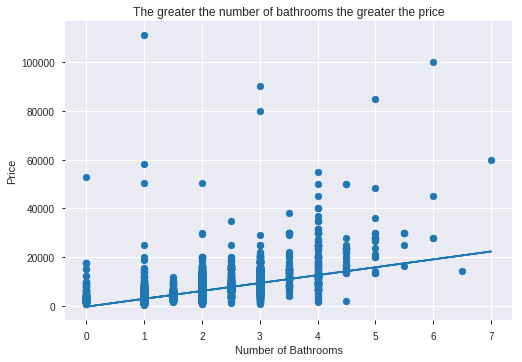

In [0]:
#Using model from lecture to take a look at highly correlated features
#fit the data to the model, apply model, plot it
plt.scatter(X,y)
plt.plot(X,y_pred);
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.title('The greater the number of bathrooms the greater the price');

In [0]:
model.coef_

array([[3232.76470936]])

In [0]:
model.intercept_

array([-247.90827392])

In [0]:
def predict(bathrooms):
    y_pred = model.predict([[bathrooms]])
    estimate = float(y_pred[0])
    coefficient = float(model.coef_[0])
    result = f'${estimate} is the estimated price for a {bathrooms:,.0f} bathroom apartment in NYC.'
    explanation = f' Each addition bathroom is associated with a ${coefficient:} increase in rent each month.'
    return result + explanation

In [0]:
predict(2)

'$6217.621144796915 is the estimated price for a 2 bathroom apartment in NYC. Each addition bathroom is associated with a $3232.764709359005 increase in rent each month.'

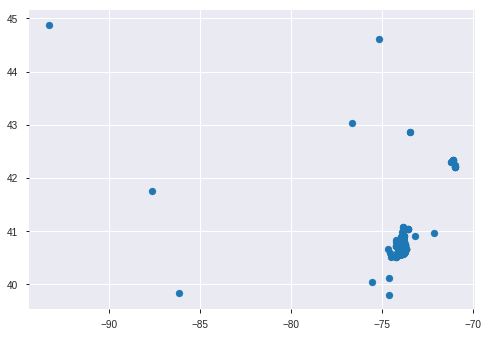

In [0]:
plt.scatter(df['longitude'], df['latitude'])